Quality of predicted box 1: Poor (Max IoU: 21.08%)
Predicted box 1 area: 60152 pixels
Ground truth box area: 139000 pixels
Quality of predicted box 2: Poor (Max IoU: 34.50%)
Predicted box 2 area: 60152 pixels
Ground truth box area: 139000 pixels


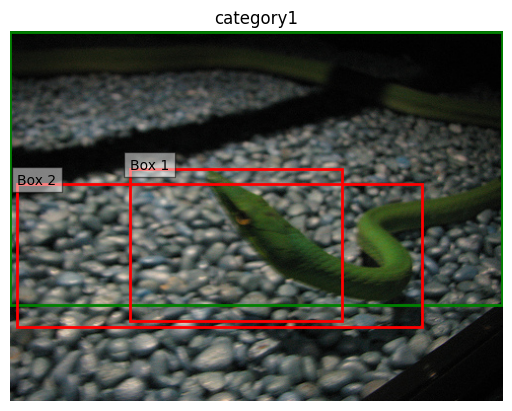

Quality of predicted box 1: Poor (Max IoU: 28.48%)
Predicted box 1 area: 90200 pixels
Ground truth box area: 285723 pixels
Quality of predicted box 2: Poor (Max IoU: 27.85%)
Predicted box 2 area: 90200 pixels
Ground truth box area: 285723 pixels
Quality of predicted box 3: Poor (Max IoU: 31.42%)
Predicted box 3 area: 90200 pixels
Ground truth box area: 285723 pixels


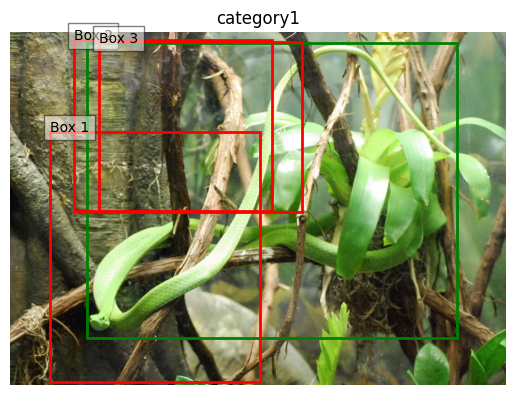

Quality of predicted box 1: Poor (Max IoU: 23.38%)
Predicted box 1 area: 27084 pixels
Ground truth box area: 115836 pixels


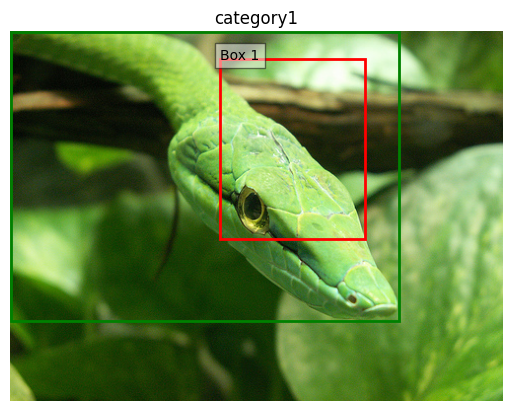

Quality of predicted box 1: Poor (Max IoU: 12.85%)
Predicted box 1 area: 40016 pixels
Ground truth box area: 88140 pixels
Quality of predicted box 2: Poor (Max IoU: 19.77%)
Predicted box 2 area: 40016 pixels
Ground truth box area: 88140 pixels


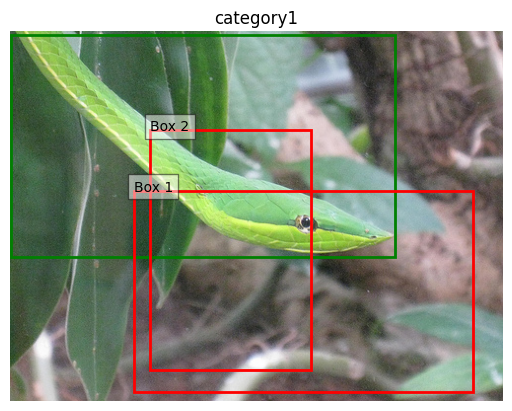

Quality of predicted box 1: Poor (Max IoU: 2.93%)
Predicted box 1 area: 71700 pixels
Ground truth box area: 178143 pixels
Quality of predicted box 2: Poor (Max IoU: 40.25%)
Predicted box 2 area: 71700 pixels
Ground truth box area: 178143 pixels


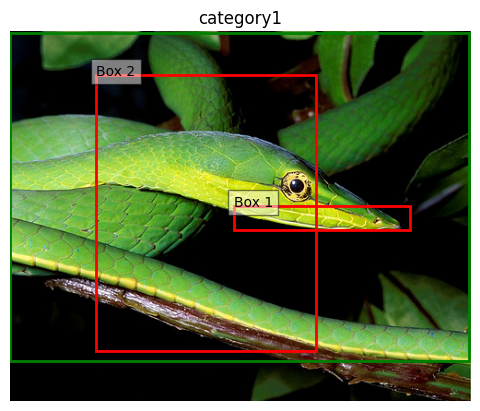

Quality of predicted box 1: Poor (Max IoU: 37.76%)
Predicted box 1 area: 70808 pixels
Ground truth box area: 187500 pixels


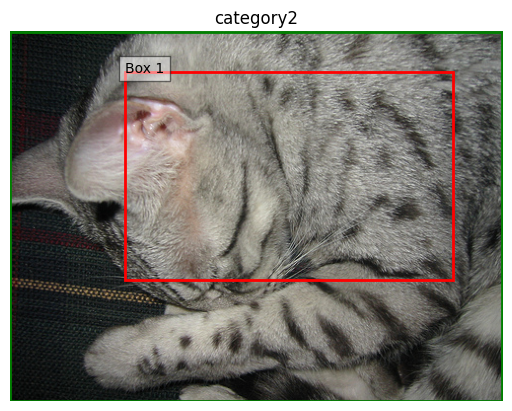

Quality of predicted box 1: Poor (Max IoU: 16.54%)
Predicted box 1 area: 24336 pixels
Ground truth box area: 86154 pixels


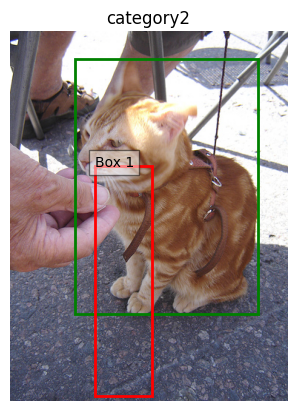

Quality of predicted box 1: Good (Max IoU: 60.08%)
Predicted box 1 area: 63840 pixels
Ground truth box area: 100548 pixels
Quality of predicted box 2: Poor (Max IoU: 25.30%)
Predicted box 2 area: 63840 pixels
Ground truth box area: 100548 pixels


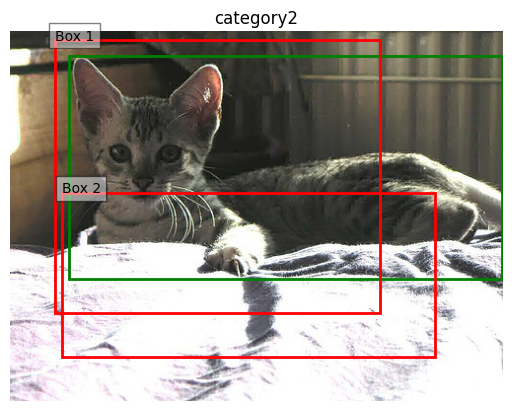

Quality of predicted box 1: Poor (Max IoU: 18.69%)
Predicted box 1 area: 96924 pixels
Ground truth box area: 68153 pixels
Quality of predicted box 2: Poor (Max IoU: 24.28%)
Predicted box 2 area: 96924 pixels
Ground truth box area: 68153 pixels
Quality of predicted box 3: Poor (Max IoU: 34.89%)
Predicted box 3 area: 96924 pixels
Ground truth box area: 68153 pixels


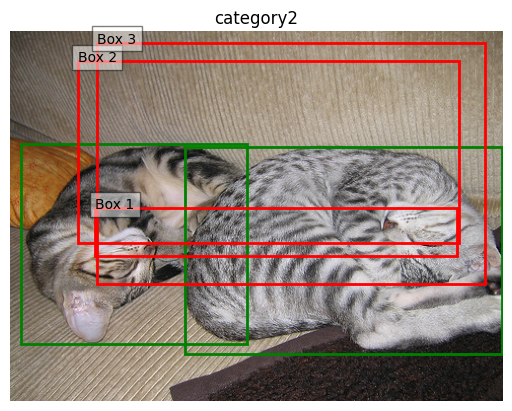

Quality of predicted box 1: Poor (Max IoU: 10.96%)
Predicted box 1 area: 45843 pixels
Ground truth box area: 9256 pixels
Quality of predicted box 2: Poor (Max IoU: 19.14%)
Predicted box 2 area: 45843 pixels
Ground truth box area: 9256 pixels
Quality of predicted box 3: Poor (Max IoU: 23.77%)
Predicted box 3 area: 45843 pixels
Ground truth box area: 9256 pixels


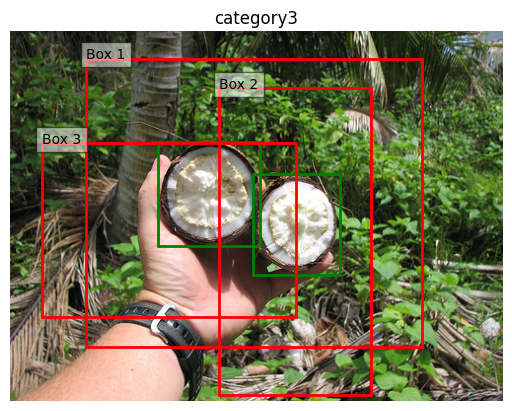

In [9]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define image and annotation folders
image_folder = r"D:\Data_Exploration\Images"
annot_folder = r"D:\Data_Exploration\Annotations"

# Define a dictionary to map category IDs to their category names
category_map = {
    "n01739381": "category1",
    "n02124075": "category2",
    "n07772935": "category3"
}

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area

    iou = (intersection_area / union_area) * 100 if union_area > 0 else 0.0
    return iou

# Function to plot annotations and calculate IoU
def plot_annotations(image_folder, annotations_folder, category_id):
    category_name = category_map.get(category_id, "Unknown Category")  # Get the equivalent category name
    image_files = os.listdir(image_folder)
    random_images = random.sample(image_files, min(10, len(image_files)))

    for image in random_images:
        image_path = os.path.join(image_folder, image)
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        xml_path = os.path.join(annotations_folder, xml_file)

        if os.path.isfile(xml_path):
            tree = ET.parse(xml_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1)
            ax.imshow(img)

            # Ground truth bounding boxes
            gt_boxes = []
            for obj in root.findall('object'):
                xmin = int(obj.find('bndbox').find('xmin').text)
                ymin = int(obj.find('bndbox').find('ymin').text)
                xmax = int(obj.find('bndbox').find('xmax').text)
                ymax = int(obj.find('bndbox').find('ymax').text)
                gt_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
                ax.add_patch(rect)
                gt_area = (xmax - xmin + 1) * (ymax - ymin + 1)

            # Predicted bounding boxes (simulated)
            # For illustration purposes, we'll simulate predicted boxes as random boxes
            pred_boxes = []
            for idx in range(random.randint(1, 3)):  # Simulate 1 to 3 predicted boxes per image
                xmin = random.randint(0, img.shape[1] // 2)
                ymin = random.randint(0, img.shape[0] // 2)
                xmax = random.randint(img.shape[1] // 2, img.shape[1])
                ymax = random.randint(img.shape[0] // 2, img.shape[0])
                pred_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
                ax.add_patch(rect)
                ax.text(xmin, ymin, f'Box {idx+1}', bbox=dict(facecolor='white', alpha=0.5))
                pred_area = (xmax - xmin + 1) * (ymax - ymin + 1)

            # Calculate IoU for each predicted box with ground truth boxes
            for idx, pred_box in enumerate(pred_boxes):
                iou_percentages = [calculate_iou(pred_box, gt_box) for gt_box in gt_boxes]
                max_iou_percentage = max(iou_percentages)
                quality = "Good" if max_iou_percentage > 50 else "Poor"  # Assess quality based on IoU threshold of 50%
                print(f"Quality of predicted box {idx+1}: {quality} (Max IoU: {max_iou_percentage:.2f}%)")
                print(f"Predicted box {idx+1} area: {pred_area} pixels")
                print(f"Ground truth box area: {gt_area} pixels")

            ax.set_title(category_name)  # Set the title to the category name
            ax.axis('off')
            plt.show()

# Plot annotations for each category
categories = ["n01739381", "n02124075", "n07772935"]
for category in categories:
    plot_annotations(os.path.join(image_folder, category), os.path.join(annot_folder, category), category)
